In [27]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = 'roberta-base'
batch_size = 16
num_epochs = 16

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
# fileTag = "clean-phase-v1"                # clean +   phase  + combine
fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
# fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
# fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

model_checkpoint

'roberta-base'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [7]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [8]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//5], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5:trainDatasetOriginal.shape[0]//5*2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*2:trainDatasetOriginal.shape[0]//5*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*3:trainDatasetOriginal.shape[0]//5*4], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*4], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//5 else (1 if x < trainDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < trainDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//5], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5:testDatasetOriginal.shape[0]//5*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*2:testDatasetOriginal.shape[0]//5*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*3:testDatasetOriginal.shape[0]//5*4], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*4], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//5 else (1 if x < testDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < testDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [9]:
trainDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['okay', 'part', 'included']","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...",Ricky called his dad for help.,Neil was impressed by the amount of work done ...,She ran to the bathroom.,He bought the ticket through a proxy.,"Andrea didn't want to be an outcast, so she at...",4
1,"['pro', 'anxious', 'rushed']","{'joy': 1, 'trust': 1, 'fear': 1, 'surprise': ...",I stopped at a blockbuster video store.,She read that the inside of a banana peel help...,Ben's wristwatch had stopped working.,Cameron looked outside the open door of the pl...,So I sped it up.,4
2,"['awful', 'upset', 'disappointed', 'embarrasse...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She felt like she was an adult so she made cup...,His mom made an appointment with the barber fo...,The toughest gal around wanted to fight.,"She was so uncomfortable, she had to go home.",This place had the best doughnuts in town.,3
3,"['bored', 'impatient', 'annoyed']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",They objected to their union.,One of my daughter's friends got married a few...,The baby settled in Chad's lap at the bottom o...,I began to get tired of using the same crayons.,Ellen had a huge crush on her classmate Evan.,3
4,"['dirty', 'upset']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Amy went camping.,"So on her next test, she failed a question, go...",Her hair was so greasy!,Bill was on boating while on holiday.,She was expecting to eat a nice dinner that ni...,2
...,...,...,...,...,...,...,...,...
11605,"['satisfied', 'satisfaction', 'pride', 'achiev...","{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",Phil put a tape recorder in his shirt pocket a...,Boris didn't really understand the meaning beh...,"After installation, Dan realized his house was...",He would buy ten tacos and eat them all under ...,She went to four different shops.,2
11606,"['understanding', 'uncomfortable', 'empty', 'n...","{'joy': 0, 'trust': 1, 'fear': 2, 'surprise': ...",Oscar drove home in his new car.,She said she felt naked without the cross.,His mind was flooded with old memories from hi...,Much of it was unsavory and hurt his business.,When I got into the water I realized that it w...,1
11607,"['annoyed', 'sad', 'betrayed', 'angry']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Kay was upset since the coupons would have sav...,Her child started to cry.,"When she was moving towards one, another car c...",Michelle didn't make the cheerleading squad.,Their babysitter informed them that their kid ...,1
11608,"['hunger', 'defeat', 'hungry', 'innovative', '...","{'joy': 1, 'trust': 1, 'fear': 0, 'surprise': ...",They put them between graham crackers.,I'm sure glad our apartment complex has a pool...,Peter eventually recovered from his illness.,Their parents blamed Jane and she was very ash...,The teacher handed the class their exams to take.,0


In [10]:
testDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,"['upset', 'frustrated', 'unsatisfied']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",The captain gasped and they hit the underside ...,Reading and the motion of the bus soon lulled ...,I fell and hurt my back.,Then she realized she was out of butter.,They put new staples in the stapler.,3
1,"['happy', 'excited']","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",He decided on spectacular New Zealand.,Fiona was driving her car one wintry day.,James won the tickets.,Suddenly he was awakened when his tent caught ...,Then she visited the Garden of the Gods.,2
2,"['foolish', 'annoyed', 'frustrated']","{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': ...",Anthony was Charles' little cousin.,Tim wound up drinking too much.,I had cracked a head gasket.,Omar's dad six years ago just before Father's ...,"After several weeks, he realized he hated grow...",2
3,"['happy', 'hungry']","{'joy': 1, 'trust': 0, 'fear': 0, 'surprise': ...",I had a golden retriever when I was younger.,"She placed the meat first, in order to cook it...",The principal told his bully to stop.,He promised her the world.,A bigger goat knocked the food right out of he...,1
4,"['proud', 'pride', 'competent']","{'joy': 3, 'trust': 1, 'fear': 0, 'surprise': ...",At one time most major cities ran PCC trolleys.,She was very grateful and thanked me.,Her mother loved the gift and thanked Sally.,The music store was a big success.,I tried to hold my stance.,3
...,...,...,...,...,...,...,...,...
11124,"['disappointed', 'annoyed', 'angry', 'aggravat...","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","When he walked over to his pool, he noticed th...",I used to go to church all the time.,They got into a fight and went to sleep angry.,"As a result, Dennis had to learn not to be so ...",Ben finished hanging the picture and then trea...,2
11125,"['happy', 'glad', 'thankful', 'motherly']","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",This spring they took a cruise from Boston to ...,She went through catalogs and made note of the...,She pulled out the kitchen stool and took a step.,I have a son that I go to the park to play bas...,He paid very little money for them.,3
11126,"['sad', 'angry', 'disappointed', 'distraught']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I had a huge crush on Robbie.,She was very pleased with the delicious pie.,John's wife told him the air freshener did not...,Night began to fall so he looked for shelter t...,The marriage didn't last and they divorced.,4
11127,"['aggravated', 'incapable', 'annoyed']","{'joy': 0, 'trust': 1, 'fear': 0, 'surprise': ...",Now I love using text messages as a quick emai...,"Coming to a large fenced in area, John let Cha...",The players rushed onto the field.,She called her best friend to see if she had r...,The plow did not move the snow to the side.,4


# load dataset

In [28]:
from datasets import load_dataset, load_metric

In [29]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/5Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/5Select-{fileTag}-test.csv'})

Using custom data configuration default-ca82b610577e1152
Reusing dataset csv (C:\Users\evans\.cache\huggingface\datasets\csv\default-ca82b610577e1152\0.0.0\2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)


In [30]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 42954
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 43195
    })
})

In [31]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['happy', 'excitement', 'dream']",
 'label': 2,
 'plutchik': "{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': 3, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 3}",
 'selection0': "Her mom went on a business trip, and Julia's aunt stayed to watch her.",
 'selection1': "Adam tells her it's been fun but it.",
 'selection2': 'Jim and Janie brought a new baby home one day.',
 'selection3': 'Will was taking a stroll in his favorite park.',
 'selection4': 'Her friends encouraged her to enter a baking competition.'}

In [32]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"  E - {example['selection4']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D', 'E'][example['label']]}")

In [33]:
show_one(dataset["train"][2])

Context: ['warm']
  A - May and Nic had been married for ten years.
  B - The scarf kept her warm.
  C - He feels much better.
  D - He laughed at her and asked when dinner would be ready.
  E - Tina wanted to be sure she had the perfect wedding dress.

Ground truth: option B


# Preprocessing Data

In [34]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

In [35]:
selectionList = ["selection0", "selection1", "selection2", "selection3", "selection4"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*5 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+5] for i in range(0, len(v), 5)] for k, v in tokenized_examples.items()}

In [36]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 5 [19, 21, 22, 22, 25]


In [37]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(5) ]

['[CLS] The following sentences contain emotions : mutually [SEP] He really liked a girl at the dance. [SEP]',
 '[CLS] The following sentences contain emotions : mutually [SEP] His friend suggested he try adopting a cat or two. [SEP]',
 '[CLS] The following sentences contain emotions : mutually [SEP] Gina and Tami talked about the boys all night long. [SEP]',
 '[CLS] The following sentences contain emotions : mutually [SEP] We got bit so much we had to go home early. [SEP]',
 "[CLS] The following sentences contain emotions : mutually [SEP] Sandy's mom felt her forehead and said she wasn't sick. [SEP]",
 '[CLS] The following sentences contain emotions : disappointed [SEP] A few months later I was running well over five miles at once! [SEP]',
 '[CLS] The following sentences contain emotions : disappointed [SEP] She hated books, but Jenny decided to graduate for her parents. [SEP]',
 '[CLS] The following sentences contain emotions : disappointed [SEP] When she went to taste it, it tasted 

In [38]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

# Fine-tuning the model

In [39]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
import torch
model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

# model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForMultipleChoice: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForMultipleChoice were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You

In [40]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [41]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [42]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [43]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(5)]

['[CLS] The following sentences contain emotions : determined [SEP] Jennifer was forbidden to talk about her co - worker. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : determined [SEP] I tried to put them down in the dining room. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : determined [SEP] She poured the oatmeal into dog dishes. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : determined [SEP] He ordered a cell phone from a new carrier. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : determined [SEP] Tina was working as a maid. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]']

In [44]:
show_one(dataset["train"][8])

Context: ['determined']
  A - Jennifer was forbidden to talk about her co-worker.
  B - I tried to put them down in the dining room.
  C - She poured the oatmeal into dog dishes.
  D - He ordered a cell phone from a new carrier.
  E - Tina was working as a maid.

Ground truth: option C


# Trainer Defined

In [45]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [46]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [47]:
!nvidia-smi

Wed Jun 22 20:52:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 30%   47C    P5    42W / 350W |   6491MiB / 24576MiB |     56%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.2 GB
Cached:    3.7 GB


In [49]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.610100,1.605305,0.281074
2,1.519000,1.454067,0.387499
3,1.438600,1.389135,0.418683
4,1.399800,1.346294,0.437504
5,1.358500,1.321087,0.450723
6,1.346000,1.302448,0.459359
7,1.323700,1.289080,0.465818
8,1.319600,1.277565,0.471721
9,1.306500,1.268696,0.475842
10,1.285000,1.264239,0.478551


TrainOutput(global_step=42960, training_loss=1.349734116310958, metrics={'train_runtime': 2848.5304, 'train_samples_per_second': 15.081, 'total_flos': 423526008255900.0, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

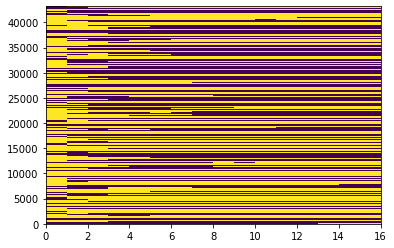

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [51]:
import pandas as pd
if model_checkpoint == 'distilbert-base-uncased-finetuned-sst-2-english':
    model_checkpoint = 'distilbert-base'
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 5Select/TI-{model_checkpoint}-{fileTag}.csv')

In [52]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 5Select/ESI-{model_checkpoint}-{fileTag}.csv')